# Analysis of daily energy data

First download pickle file from GCP storage bucket.  The structure is indexed
on interval_date and each column is an array of 48 values, each value representing
each half hour starting at midnight.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import storage

GCP_STORAGE_BUCKET_ID = os.environ.get(
    'GCP_STORAGE_BUCKET_ID', 'GCP_STORAGE_BUCKET_ID not set.')
NMI = os.environ.get(
    'NMI', 'NMI not set.')

STORAGE_CLIENT = storage.Client()
bucket = STORAGE_CLIENT.get_bucket(GCP_STORAGE_BUCKET_ID)
pkl_file_name = f"dailies_{NMI}.pkl"
blob = storage.Blob(pkl_file_name, bucket)
pkl_file_path = f"/tmp/{pkl_file_name}"

with open(pkl_file_path, 'wb') as pkl_file:
    STORAGE_CLIENT.download_blob_to_file(blob, pkl_file)

df = pd.read_pickle(pkl_file_path)
df

,meter_consumptions_kwh,meter_generations_kwh,solar_generations_kwh,solar_mean_powrs_kw
2014-11-26 00:00:00+00:00,"[0.194, 0.188, 0.225, 0.263, 0.181, 0.175, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-27 00:00:00+00:00,"[0.256, 0.244, 0.144, 0.163, 0.144, 0.15, 0.15...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-28 00:00:00+00:00,"[0.313, 0.425, 0.319, 0.194, 0.169, 0.163, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-29 00:00:00+00:00,"[0.225, 0.212, 0.206, 0.231, 0.2, 0.163, 0.169...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-30 00:00:00+00:00,"[0.769, 0.713, 0.163, 0.169, 0.156, 0.169, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
2020-04-16 00:00:00+00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2020-04-17 00:00:00+00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2020-04-18 00:00:00+00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2020-04-19 00:00:00+00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Nested arrays in a dataframe are a bit difficult to use, let's
unnest them into 48 rows of values.

In [2]:
meter_cons = np.array(df['meter_consumptions_kwh'].values.tolist())
meter_gens = np.array(df['meter_generations_kwh'].values.tolist())
solar_gens = np.array(df['solar_generations_kwh'].values.tolist())
solar_powrs = np.array(df['solar_mean_powrs_kw'].values.tolist())
interval_dates = np.repeat(df.index.tolist(), meter_cons.shape[1])

df_exploded = pd.DataFrame(np.column_stack((
    interval_dates, 
    meter_cons.ravel(),
    meter_gens.ravel(),
    solar_gens.ravel(),
    solar_powrs.ravel()
    )),
    columns=['interval_date', 'meter_consumption_kwh', 'meter_generation_kwh', 'solar_generation_kwh', 'solar_mean_powr_kw'],
)
df_exploded.reset_index(inplace=True)
df_exploded.rename(columns={'index':'interval'}, inplace=True)
df_exploded['interval'] = (df_exploded['interval'] % 48) + 1
df_exploded.set_index('interval_date', inplace=True)
df_exploded['meter_consumption_kwh'] = pd.to_numeric(df_exploded['meter_consumption_kwh'])
df_exploded['meter_generation_kwh'] = pd.to_numeric(df_exploded['meter_generation_kwh'])
df_exploded['solar_generation_kwh'] = pd.to_numeric(df_exploded['solar_generation_kwh'])
df_exploded['solar_mean_powr_kw'] = pd.to_numeric(df_exploded['solar_mean_powr_kw'])
df_exploded


,interval,meter_consumption_kwh,meter_generation_kwh,solar_generation_kwh,solar_mean_powr_kw
interval_date,,,,,
2014-11-26 00:00:00+00:00,1,0.194,0.0,0.0,0.0
2014-11-26 00:00:00+00:00,2,0.188,0.0,0.0,0.0
2014-11-26 00:00:00+00:00,3,0.225,0.0,0.0,0.0
2014-11-26 00:00:00+00:00,4,0.263,0.0,0.0,0.0
2014-11-26 00:00:00+00:00,5,0.181,0.0,0.0,0.0
...,...,...,...,...,...
2020-04-20 00:00:00+00:00,44,0.000,0.0,0.0,0.0
2020-04-20 00:00:00+00:00,45,0.000,0.0,0.0,0.0
2020-04-20 00:00:00+00:00,46,0.000,0.0,0.0,0.0


Here, we define the periods we want to compare and create list of dictionaries as plot data.



In [3]:
periods = [
    {'name': 'Epoch', 'actual_start': '2014-11-26', 'actual_end': '2015-04-06'},
    {'name': 'Installed Solar 3 kW', 'actual_start': '2015-04-07', 'actual_end': '2016-08-14'},
    {'name': 'Installed Battery 8 kW', 'actual_start': '2016-08-14', 'actual_end': '2016-10-17'},
    {'name': 'Upgraded to Solar 6 kW', 'actual_start': '2016-10-18', 'actual_end': '2019-11-30'},
    {'name': 'Purchased EV', 'actual_start': '2019-12-01', 'actual_end': '2020-03-22'},
    {'name': 'Red EV Plan', 'actual_start': '2020-03-23', 'actual_end': '2020-12-31'},
]

periods_data = []
for p in periods:
    period_data = {**p}
    date_mask = (df_exploded.index >= p.get('actual_start')) & (df_exploded.index <= p.get('actual_end'))
    df_period = df_exploded.loc[date_mask]
    df_hh_mean = df_period.groupby(['interval']).agg(
        meter_consumptions_kwh=pd.NamedAgg(
            column='meter_consumption_kwh', aggfunc='mean'),
        meter_generations_kwh=pd.NamedAgg(
            column='meter_generation_kwh', aggfunc='mean'),
        solar_generations_kwh=pd.NamedAgg(column='solar_generation_kwh', aggfunc='mean'),
    )
    period_data['df_hh_mean'] = df_hh_mean
    periods_data.append(period_data)


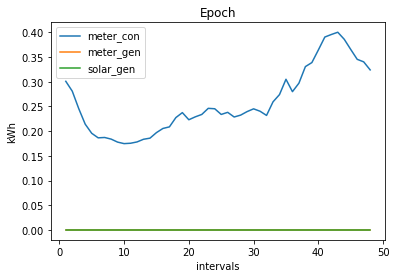

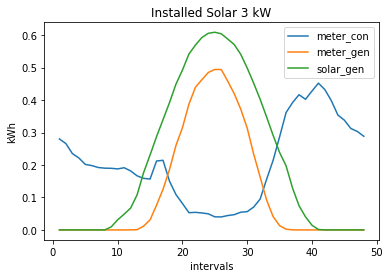

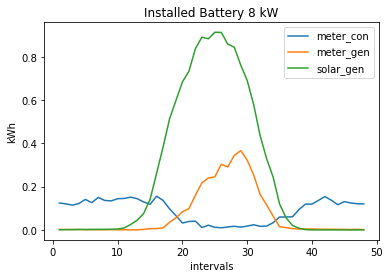

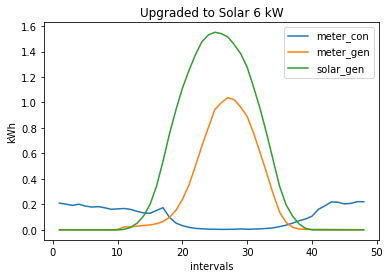

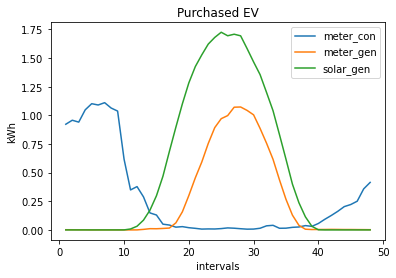

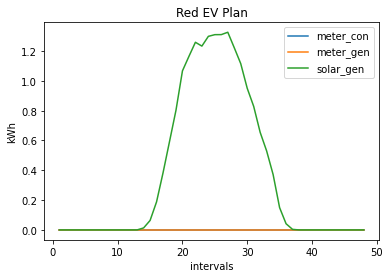

In [4]:
for period_data in periods_data:
    df_hh_mean = period_data['df_hh_mean']
    x = np.linspace(1, 48, num=48)
    fig, axes = plt.subplots()
    axes.plot(x, df_hh_mean['meter_consumptions_kwh'], label='meter_con')
    axes.plot(x, df_hh_mean['meter_generations_kwh'], label='meter_gen')
    axes.plot(x, df_hh_mean['solar_generations_kwh'], label='solar_gen')
    axes.set_xlabel('intervals')
    axes.set_ylabel('kWh')
    axes.set_title(period_data.get('name'))
    axes.legend()
